# TP Perceptron - HMMA308:
Joseph Salmon 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from tp_perceptron_source import (rand_gauss, rand_bi_gauss, rand_checkers,
                                  rand_clown, plot_2d, gradient,
                                  plot_gradient, frontiere_new,
                                  hinge_loss, gr_hinge_loss,
                                  mse_loss, gr_mse_loss)

import seaborn as sns
from matplotlib import rc
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'text.usetex': False,
#           'axes.linewidth': 1,
#           'axes.labelsize': 4,
#           'font.size': 1,
#           'figure.titlesize': 5, 
#           'legend.fontsize': 4,
#           'xtick.labelsize' : 4,
#           'ytick.labelsize' : 4,
#           'xtick.major.size'     : 2,
#           'ytick.major.size'     : 2,
#           'xtick.major.width' : 1,
#           'ytick.major.width' : 1,
#          
         }
plt.rcParams.update(params)

# sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("ticks")
sns.axes_style()


# seed initialization
np.random.seed(seed=44)

# for saving files
saving_activated = True  # False
%matplotlib notebook

In [2]:
plt.rcParams.keys() # to get all attribute you can pre-specify in matplotlib.

/home/jo/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'a

In [3]:
# Changer ici par votre Prenom Nom:
prenom = "Joseph"  # à remplacer
nom = "Salmon"  # à remplacer
extension = ".ipynb"
tp = "TP1_HMMA308"

In [4]:
filename = "_".join([tp, prenom, nom]) + extension

In [5]:
filename = filename.lower()
print(filename)

tp1_hmma308_joseph_salmon.ipynb


In [6]:
# utiliser filename pour votre nom de TP /  rendu

# Question 1: data generation

In [7]:
###############################################################################
#            Data Generation: example
###############################################################################

n = 100
mu = [1., 1.]
sigmas = [1., 1.]
rand_gauss(n, mu, sigmas)

n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 5.
X2, y2 = rand_clown(n1, n2, sigmas1, sigmas2)

n1 = 75
n2 = 75
sigma = 0.1
X3, y3 = rand_checkers(n1, n2, sigma)

# Displaying labeled data

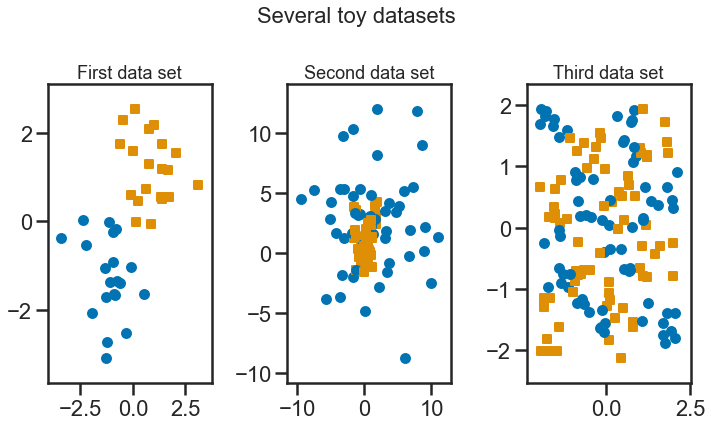

In [8]:
plt.close("all")

plt.figure(1, figsize=(10, 6))
plt.suptitle("Several toy datasets", fontsize=22)
plt.subplot(131)
plt.title('First data set', {'fontsize': 18})
plot_2d(X1, y1)

plt.subplot(132)
plt.title('Second data set', {'fontsize': 18})
plot_2d(X2, y2)

plt.subplot(133)
plt.title('Third data set', {'fontsize': 18})
plot_2d(X3, y3)

plt.tight_layout()
plt.subplots_adjust(top = 0.8)

plt.show()

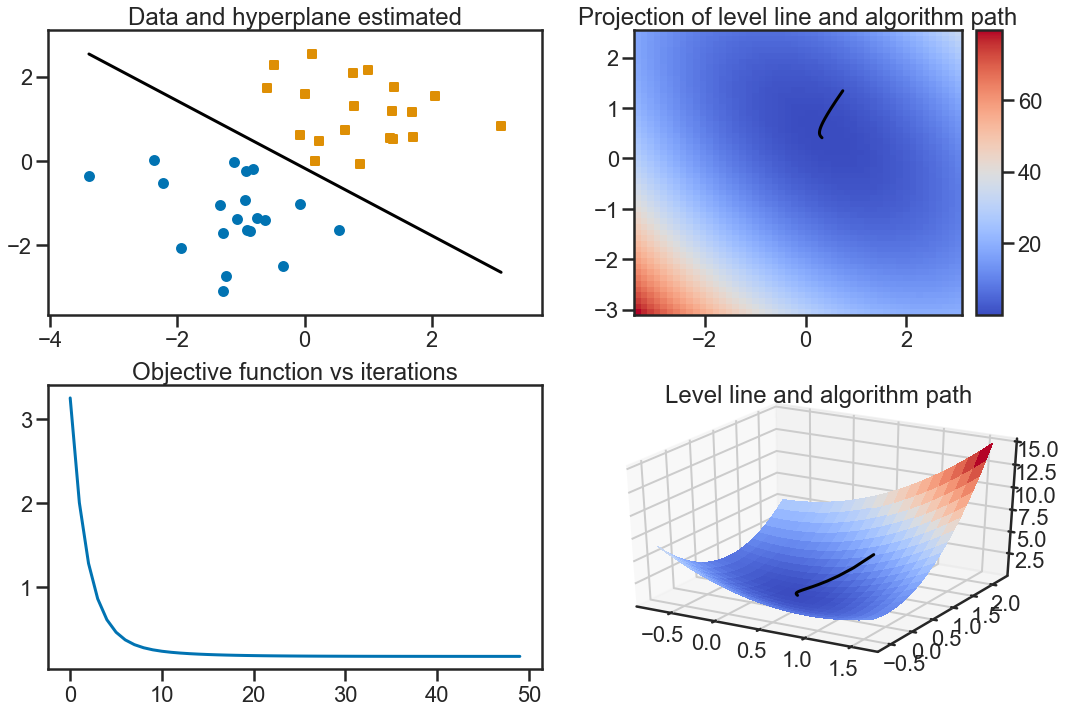

In [9]:
# MSE Loss:
epsilon = 0.001
niter = 50
w_ini = np.random.randn(X1.shape[1] + 1)
lfun = mse_loss
gr_lfun = gr_mse_loss

# Stochastic Gradient Descent: case with a good stepsize, convergence is clear
plt.figure(2,figsize=(15,10))

wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun, gr_lfun,
                     stochastic=False)
plot_gradient(X1, y1, wh, costh, lfun)
# plt.suptitle('MSE and batch', fontsize=30)
plt.tight_layout()

plt.show()

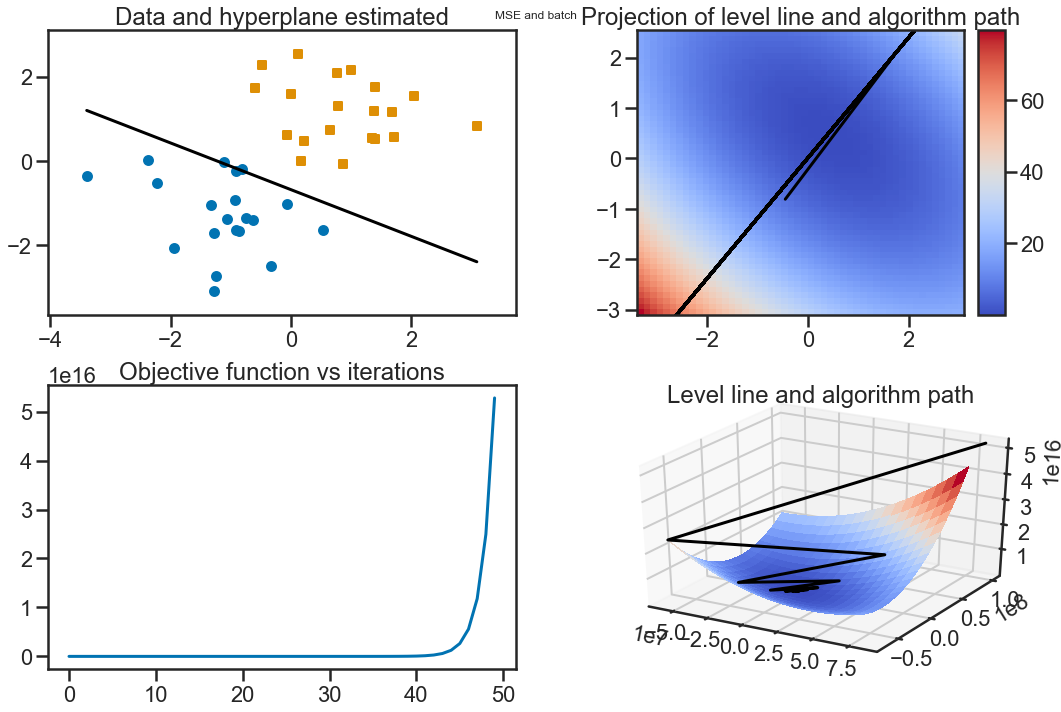

In [10]:
# Stochastic Gradient Descent: case with a larger stepsize,
# oscilations due to too large stepsizes can be often seen.

epsilon = 0.01
niter = 50
w_ini = np.random.randn(X1.shape[1] + 1)
lfun = mse_loss
gr_lfun = gr_mse_loss

# Stochastic Gradient Descent: case with a good stepsize, convergence is clear
plt.figure(3, figsize=(15, 10))
wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun, gr_lfun,
                     stochastic=False)
plot_gradient(X1, y1, wh, costh, lfun)
plt.suptitle('MSE and batch', fontsize=12)
plt.show()

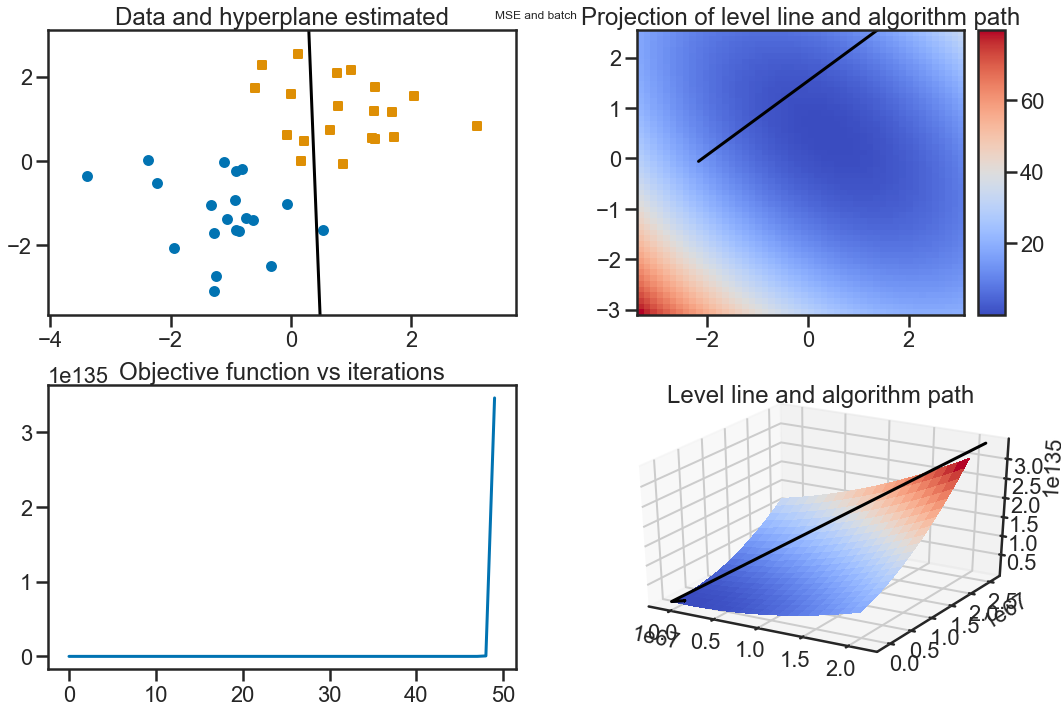

In [11]:
# Stochastic Gradient Descent: case with a very larger stepsize, divergence

epsilon = 0.1
niter = 50
w_ini = np.random.randn(X1.shape[1] + 1)
lfun = mse_loss
gr_lfun = gr_mse_loss

# Stochastic Gradient Descent: case with a good stepsize, convergence is clear
plt.figure(4, figsize=(15, 10))
wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun, gr_lfun,
                     stochastic=False)
plot_gradient(X1, y1, wh, costh, lfun)
plt.suptitle('MSE and batch', fontsize=12)
plt.show()

/home/jo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


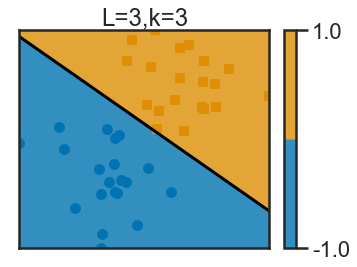

In [12]:
# Sklearn SGD:

clf = linear_model.SGDClassifier()
clf.fit(X1, y1)

plt.figure(88)
ax = plt.gca()
wsgd = [clf.intercept_[0], clf.coef_[0, 0], clf.coef_[0, 1]]
frontiere_new(clf, X1, y1, ax, wsgd, step=200, alpha_choice=1)
plt.show()

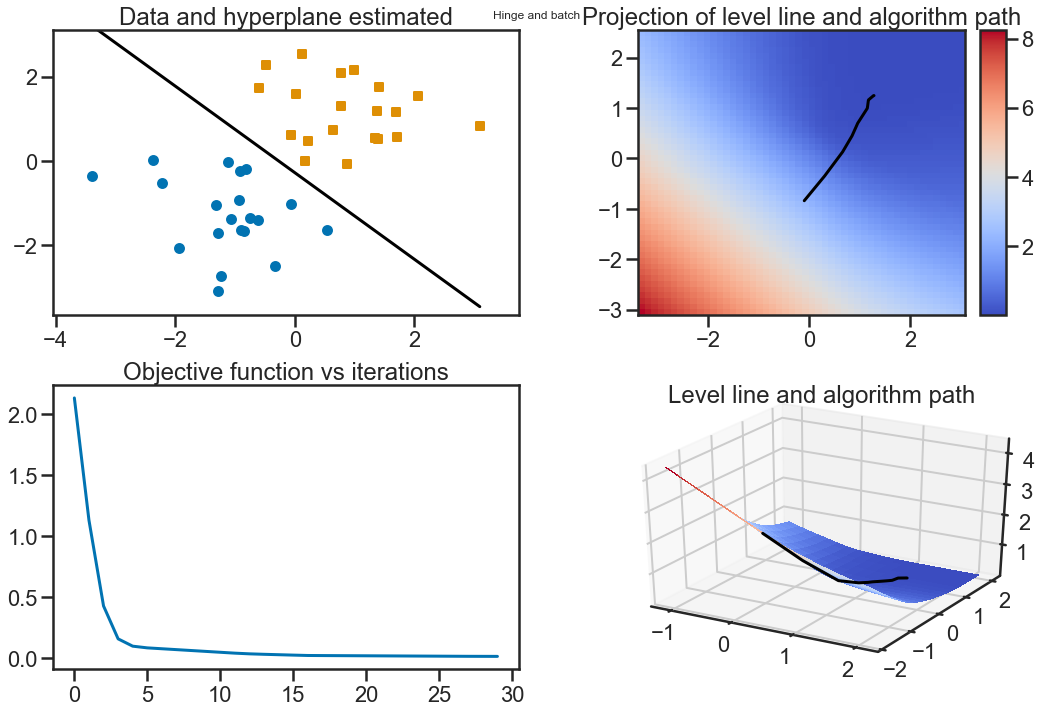

In [13]:
# Hinge Loss case:
epsilon = 0.01
niter = 30
std_ini = 1.
w_ini = std_ini * np.random.randn(X1.shape[1] + 1)

lfun = hinge_loss
gr_lfun = gr_hinge_loss
wh, costh = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                     gr_lfun, stochastic=False)

plt.figure(6, figsize=(15, 10))
plt.suptitle('Hinge and batch')
plot_gradient(X1, y1, wh, costh, lfun)
plt.show()

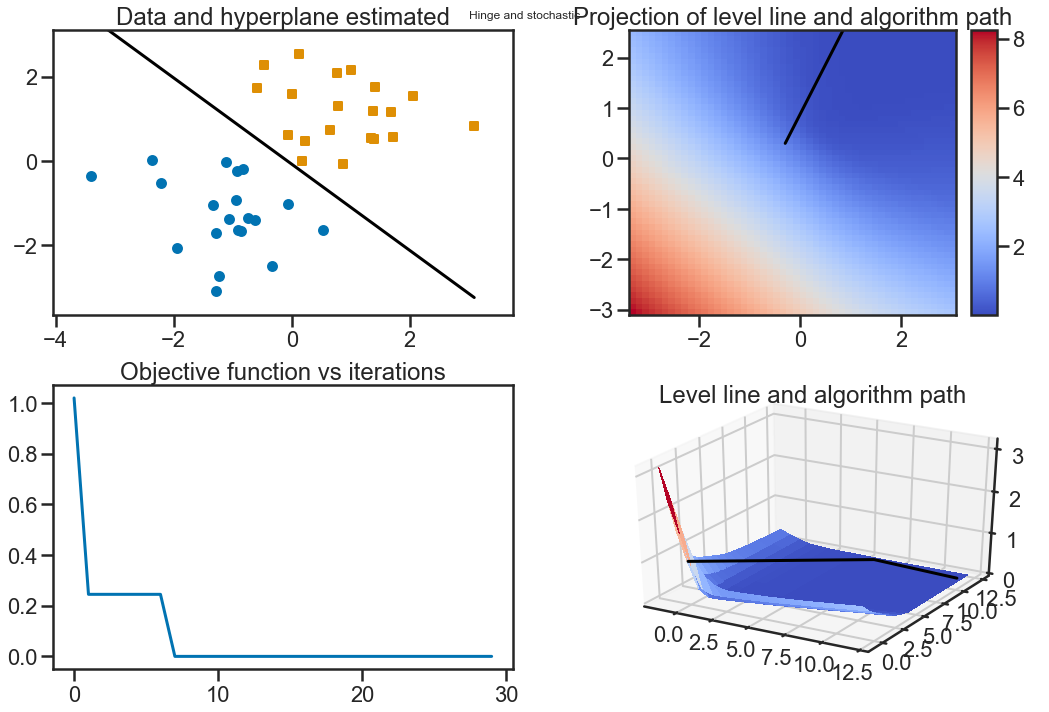

In [14]:
plt.figure(7, figsize=(15, 10))
plt.suptitle('Hinge and stochastic')
epsilon = 7
niter = 30
w_ini = std_ini * np.random.randn(X1.shape[1] + 1)

wh_sto, costh_sto = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, lfun)
plt.show()

# Frontiere evolution:
a brighter display is given for the newest iterations, using alpha_choice for controling the alpha parameter in plot_2d

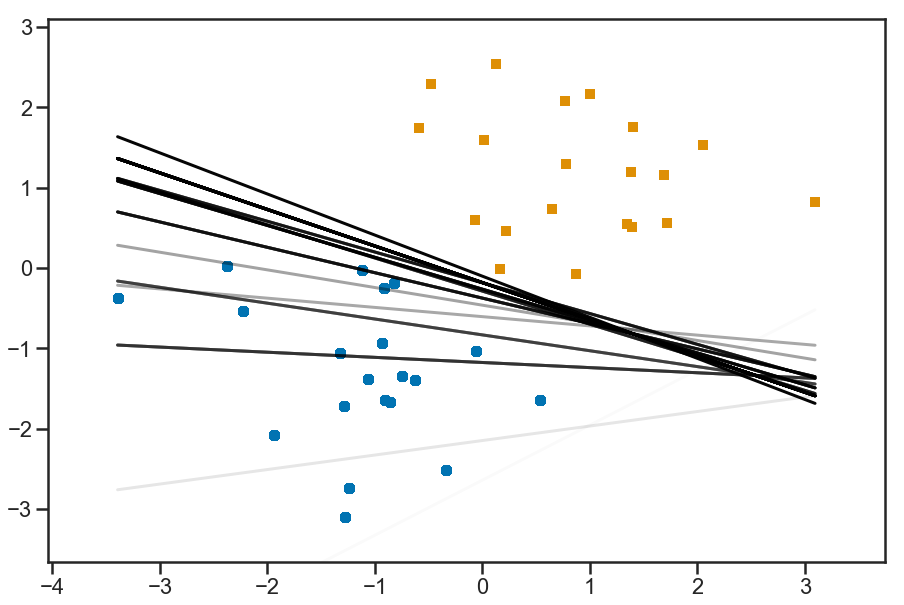

In [15]:
epsilon = 0.1
niter = 50
plt.figure(8, figsize=(15, 10))
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter, w_ini, lfun,
                             gr_lfun, stochastic=True)
indexess = np.arange(0., 1., 1. / float(niter))

for i in range(niter):
    plot_2d(X1, y1, wh_sto[i, :], alpha_choice=indexess[i])


In [16]:
# Perceptron with feature interactions

In [17]:
epsilon = 0.01
niter = 50

poly_quad = PolynomialFeatures(degree=2)
clf = linear_model.SGDClassifier(max_iter=100)

my_pipeline = Pipeline([('poly_quad', poly_quad), ('sgd', clf)])
my_pipeline.fit(X2, y2)

/home/jo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly_quad', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('sgd', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', ma...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

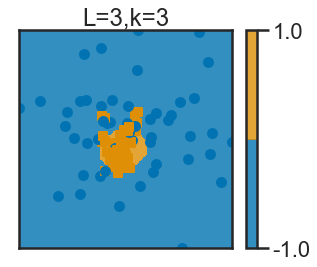

In [19]:
plt.figure(11)
ax = plt.gca()
frontiere_new(my_pipeline, X2, y2, ax)
plt.show()